In [2]:
import pandas as pd 
import numpy as np

In [3]:
data = pd.read_csv(r"C:\Users\user\Desktop\Projects\British_Airways_Project\Data\customer_booking.csv",encoding='latin1')


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
data.shape

(50000, 14)

In [9]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [13]:
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [6]:
data.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

## EDA

## Plots

In [7]:
len(data.columns)

14

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns

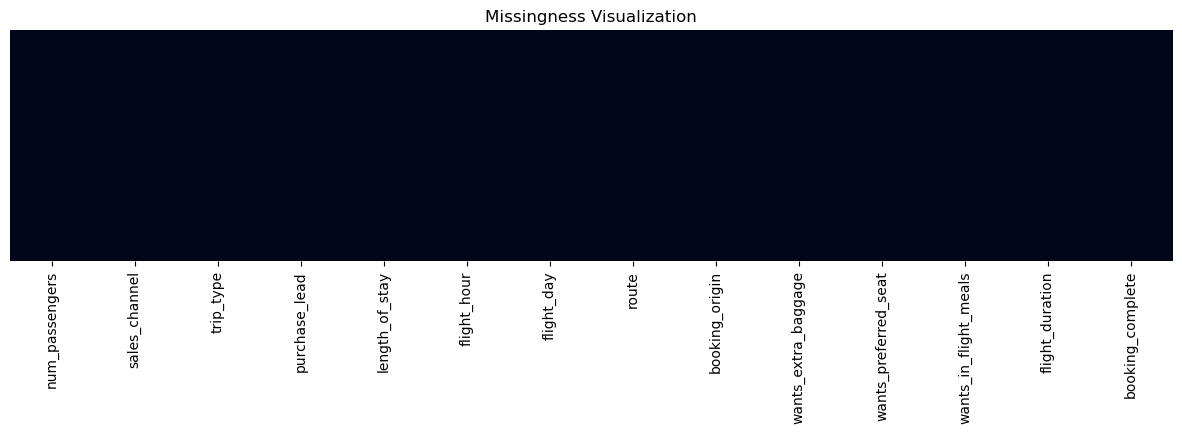

In [68]:
plt.figure(figsize=(15,3))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)
plt.title("Missingness Visualization")
plt.show()

In [11]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [5]:
def separate_df(dataframe):
    num_df = data.select_dtypes(include=['number'])
    cat_df = data.select_dtypes(exclude=['number'])
    return num_df, cat_df

In [6]:
num_df, cat_df = separate_df(data)

In [7]:
print(f"Numerical Dataframe : {num_df.shape}")
print(f"Categorical Dataframe : {cat_df.shape}")

Numerical Dataframe : (50000, 9)
Categorical Dataframe : (50000, 5)


In [72]:
def plot_boxplots(data):
    num_cols = len(data.columns)
    num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 4))  # Create subplots

    for i, column in enumerate(data.columns):
        ax = axes[i // 3, i % 3] if num_rows > 1 else axes[i % 3]  # Select subplot
        data.boxplot(column=column, ax=ax)  # Plot boxplot for the column
        # sns.stripplot(y=column,data=data,color='magenta',size=2,ax=ax)
        ax.set_title(f'Boxplot of {column}')  # Set the title

    plt.tight_layout()  # Adjust layout
    plt.show()  # Show the plots


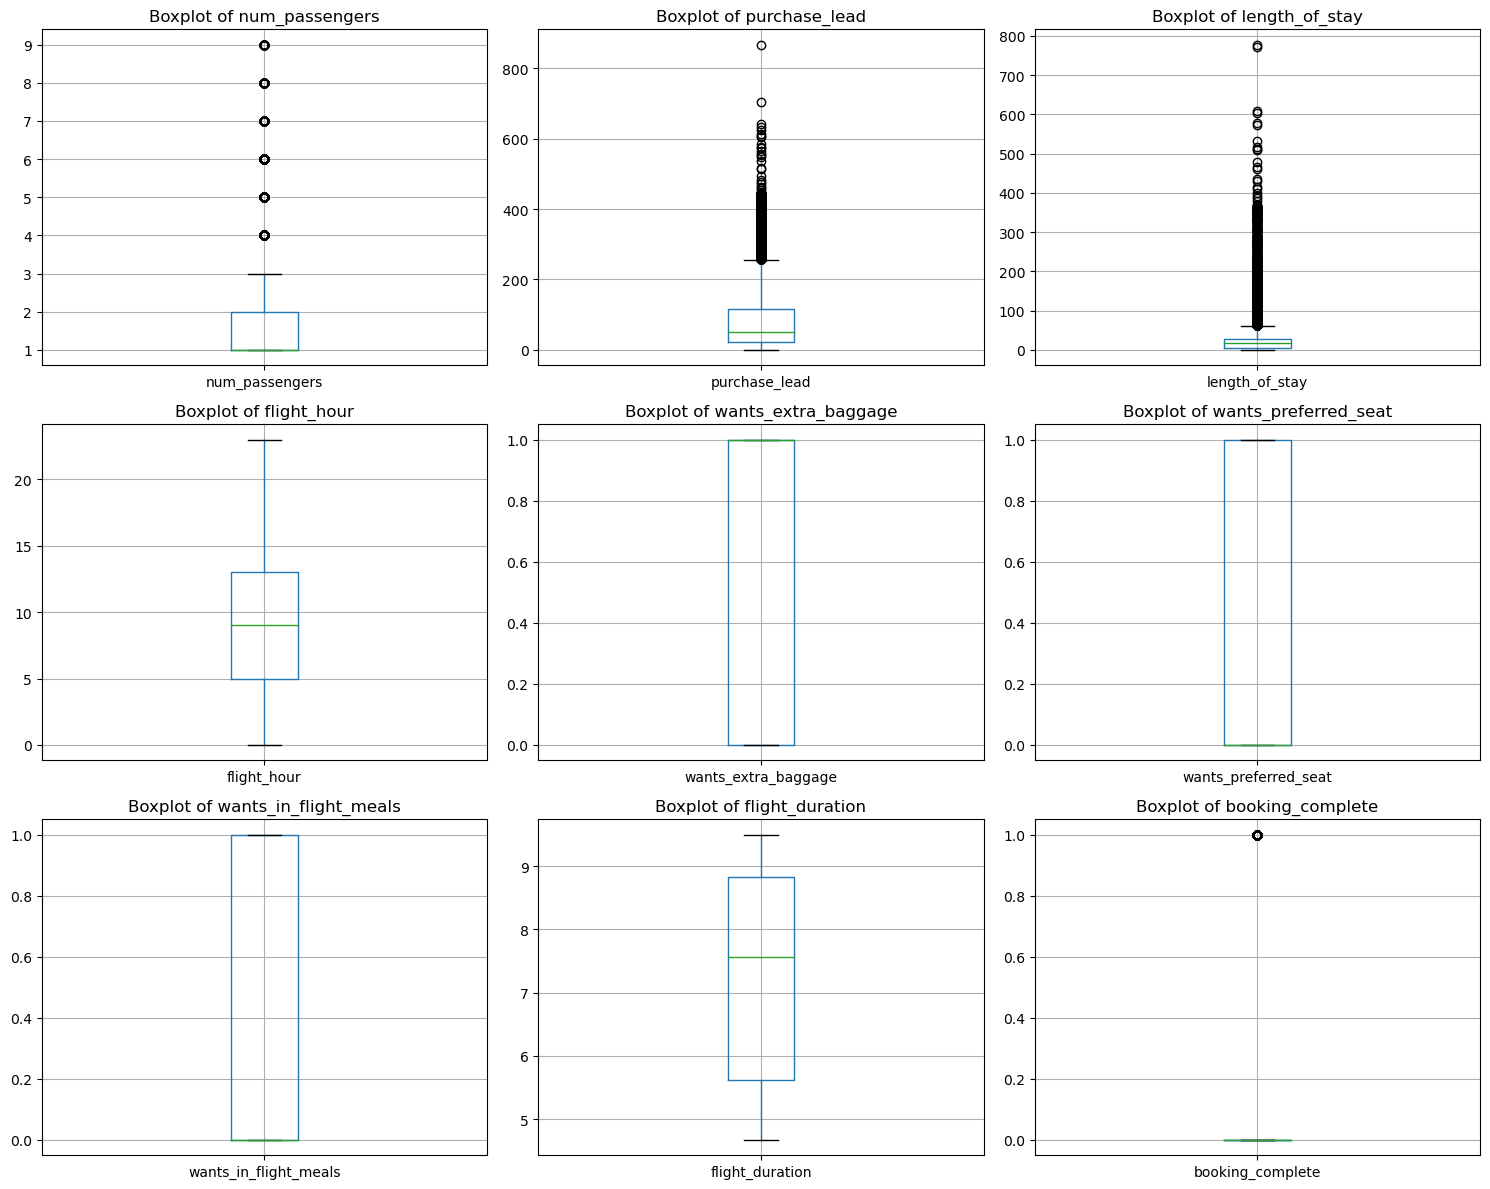

In [73]:
plot_boxplots(num_df)

In [74]:
data['wants_in_flight_meals'].value_counts()

wants_in_flight_meals
0    28643
1    21357
Name: count, dtype: int64

In [75]:
def plot_kdeplots(data):
    num_cols = len(data.columns)
    num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 4))  # Create subplots

    for i, column in enumerate(data.columns):
        ax = axes[i // 3, i % 3] if num_rows > 1 else axes[i % 3]  # Select subplot
        sns.histplot(data[column], ax=ax,kde=True)  # Plot boxplot for the column
        ax.set_title(f'Distribution of {column}')  # Set the title

    plt.tight_layout()  # Adjust layout
    plt.show()  # Show the plots

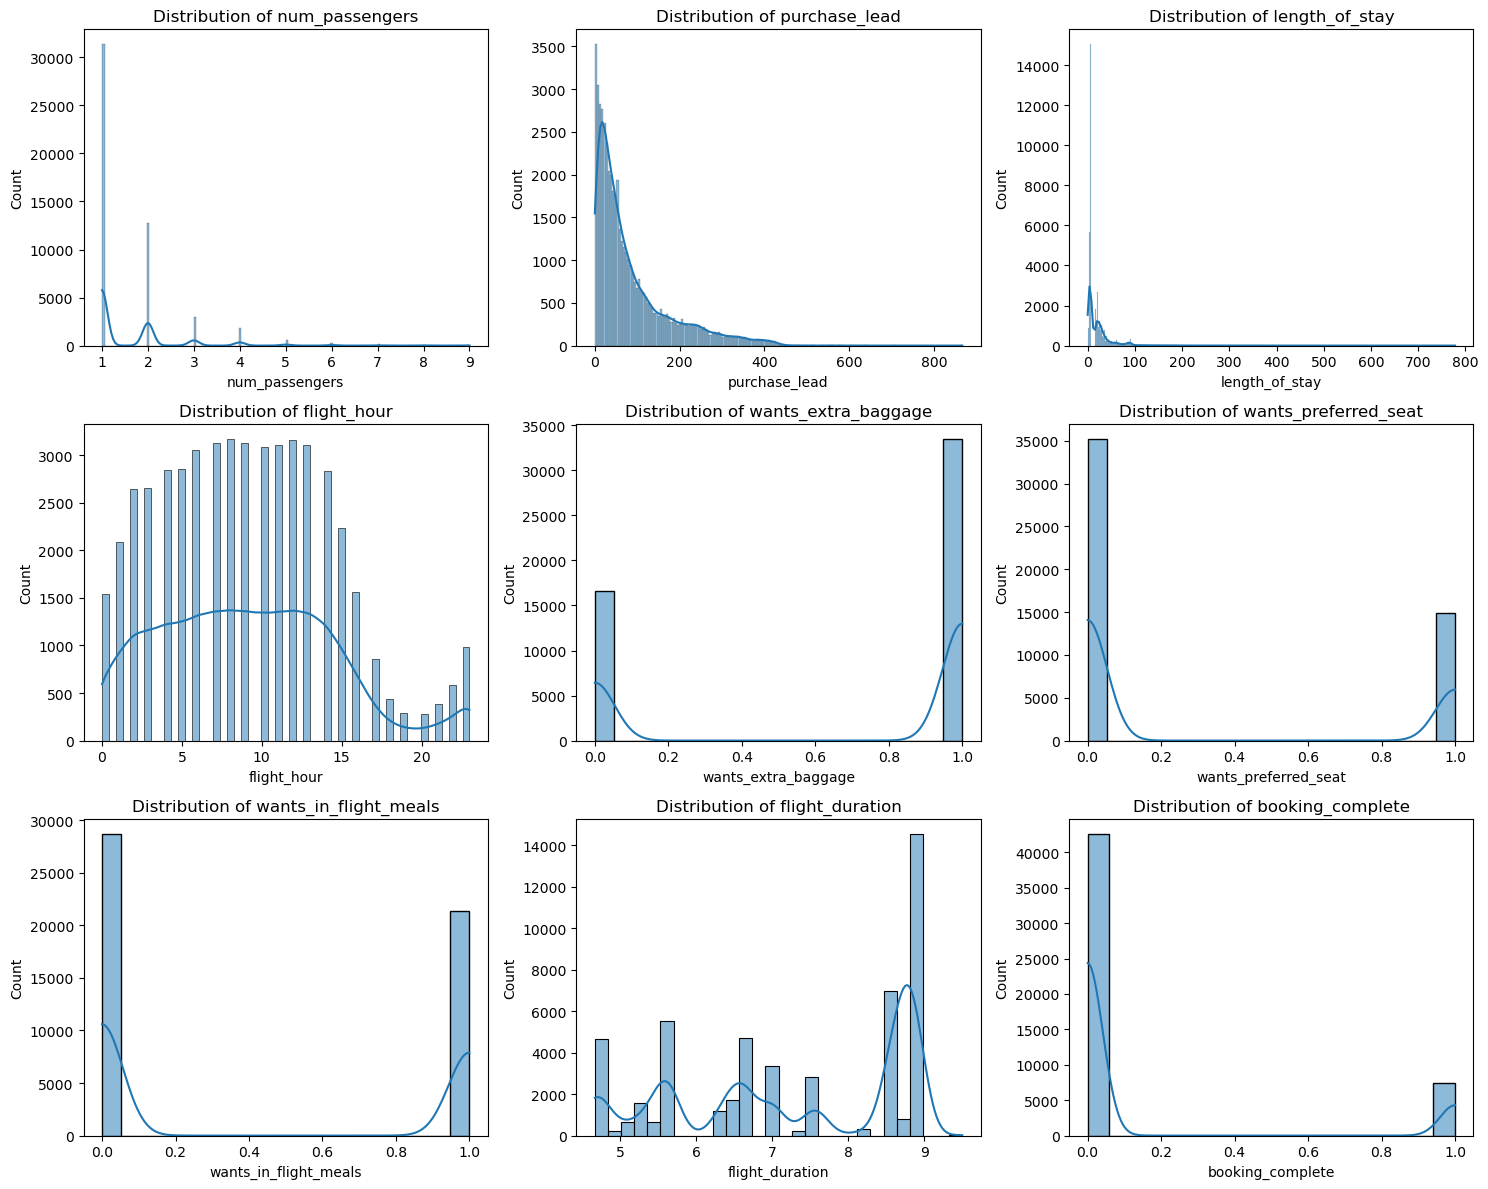

In [76]:
plot_kdeplots(num_df)

In [77]:
data['flight_hour'].value_counts()

flight_hour
8     3165
12    3163
9     3132
7     3126
11    3110
13    3101
10    3085
6     3050
5     2851
4     2843
14    2833
3     2655
2     2642
15    2234
1     2089
16    1557
0     1539
23     986
17     861
22     579
18     439
21     389
19     295
20     276
Name: count, dtype: int64

In [81]:
data['flight_duration'].value_counts()

flight_duration
8.83    14520
8.58     6965
5.62     5524
6.62     4721
7.00     3374
7.57     2835
4.67     2743
6.42     1737
5.33     1554
4.75     1255
6.33     1190
8.67      807
5.52      667
5.07      512
4.72      502
8.15      311
5.00      241
7.42      224
4.83      156
5.13      125
9.50       37
Name: count, dtype: int64


Findings: 
- We have some skew in some numerical variables that we'll look into.
- Some numerical variables have distinct values. We'll keep this in mind during feature engineering and manipulate while evaluating performance.

# Bivariate Analysis

In [92]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


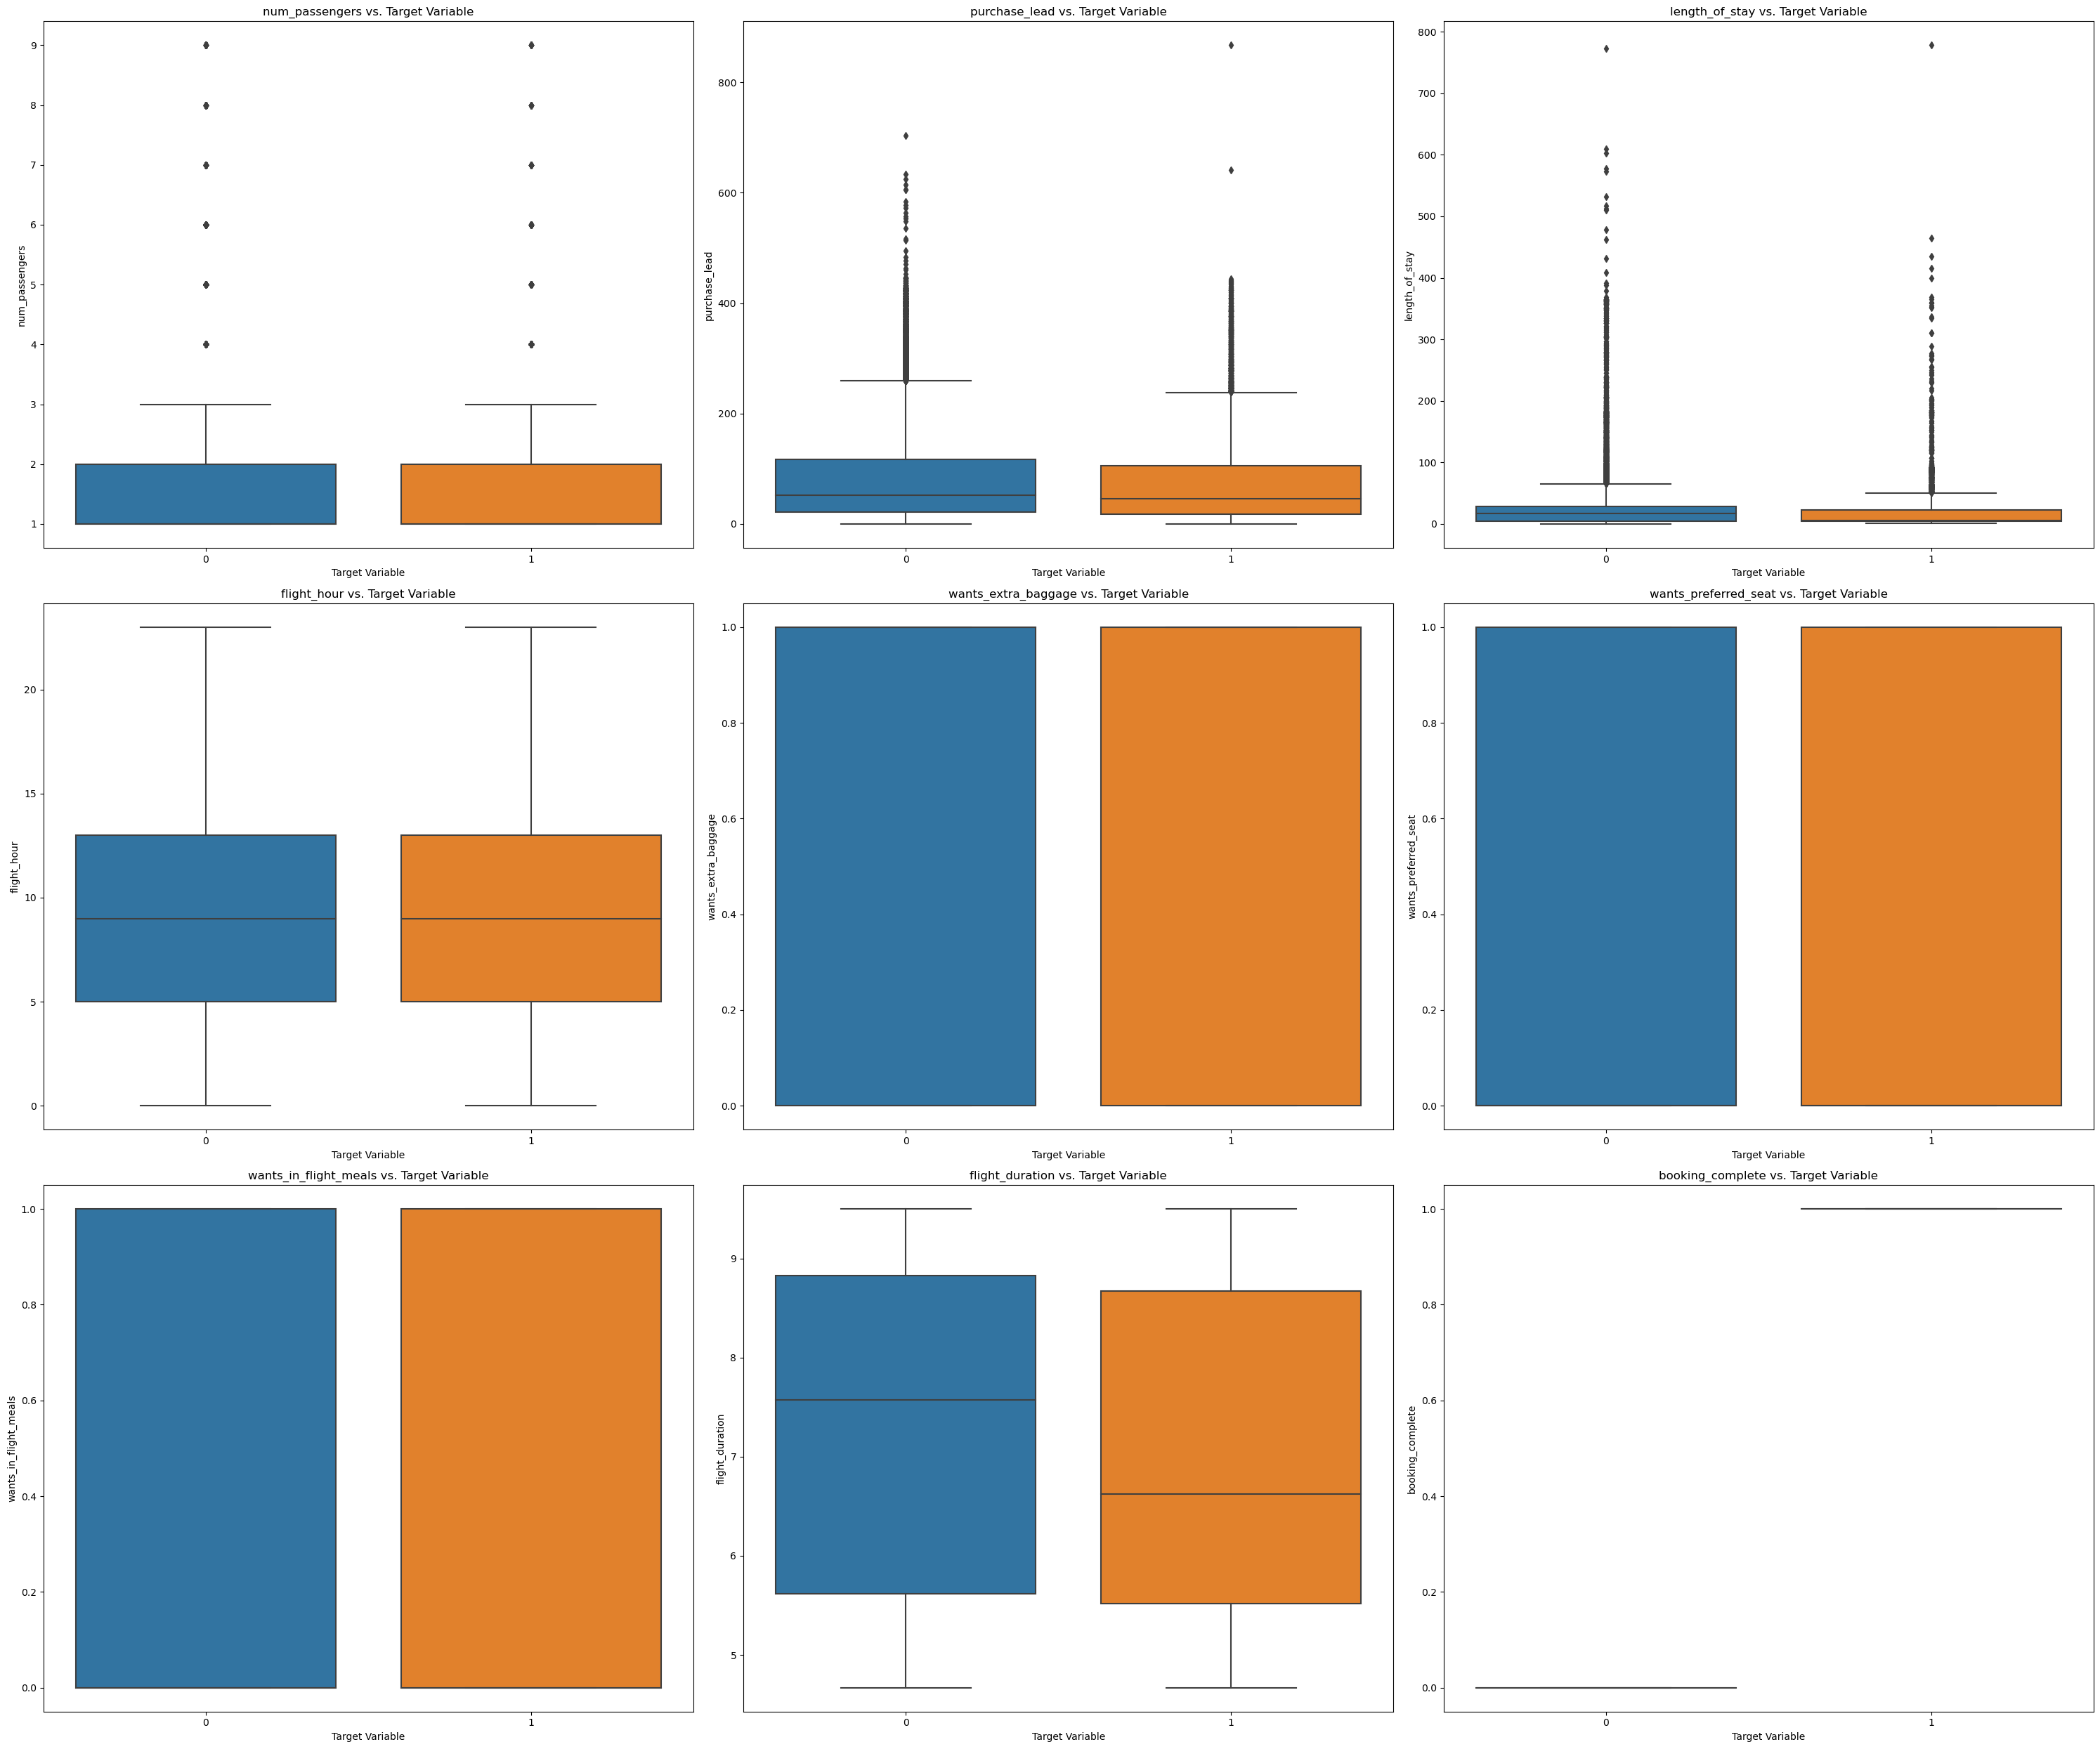

In [99]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_cols = 3  # Number of columns per row
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  # Calculate number of rows

plt.figure(figsize=(30,25))
for i, num_col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x='booking_complete', y=num_col, data=data)
    plt.title(f'{num_col} vs. Target Variable')
    plt.xlabel('Target Variable')
    plt.ylabel(num_col)

plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_19192\4265419383.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=num_col, hue='booking_complete', fill=True, alpha=0.5)


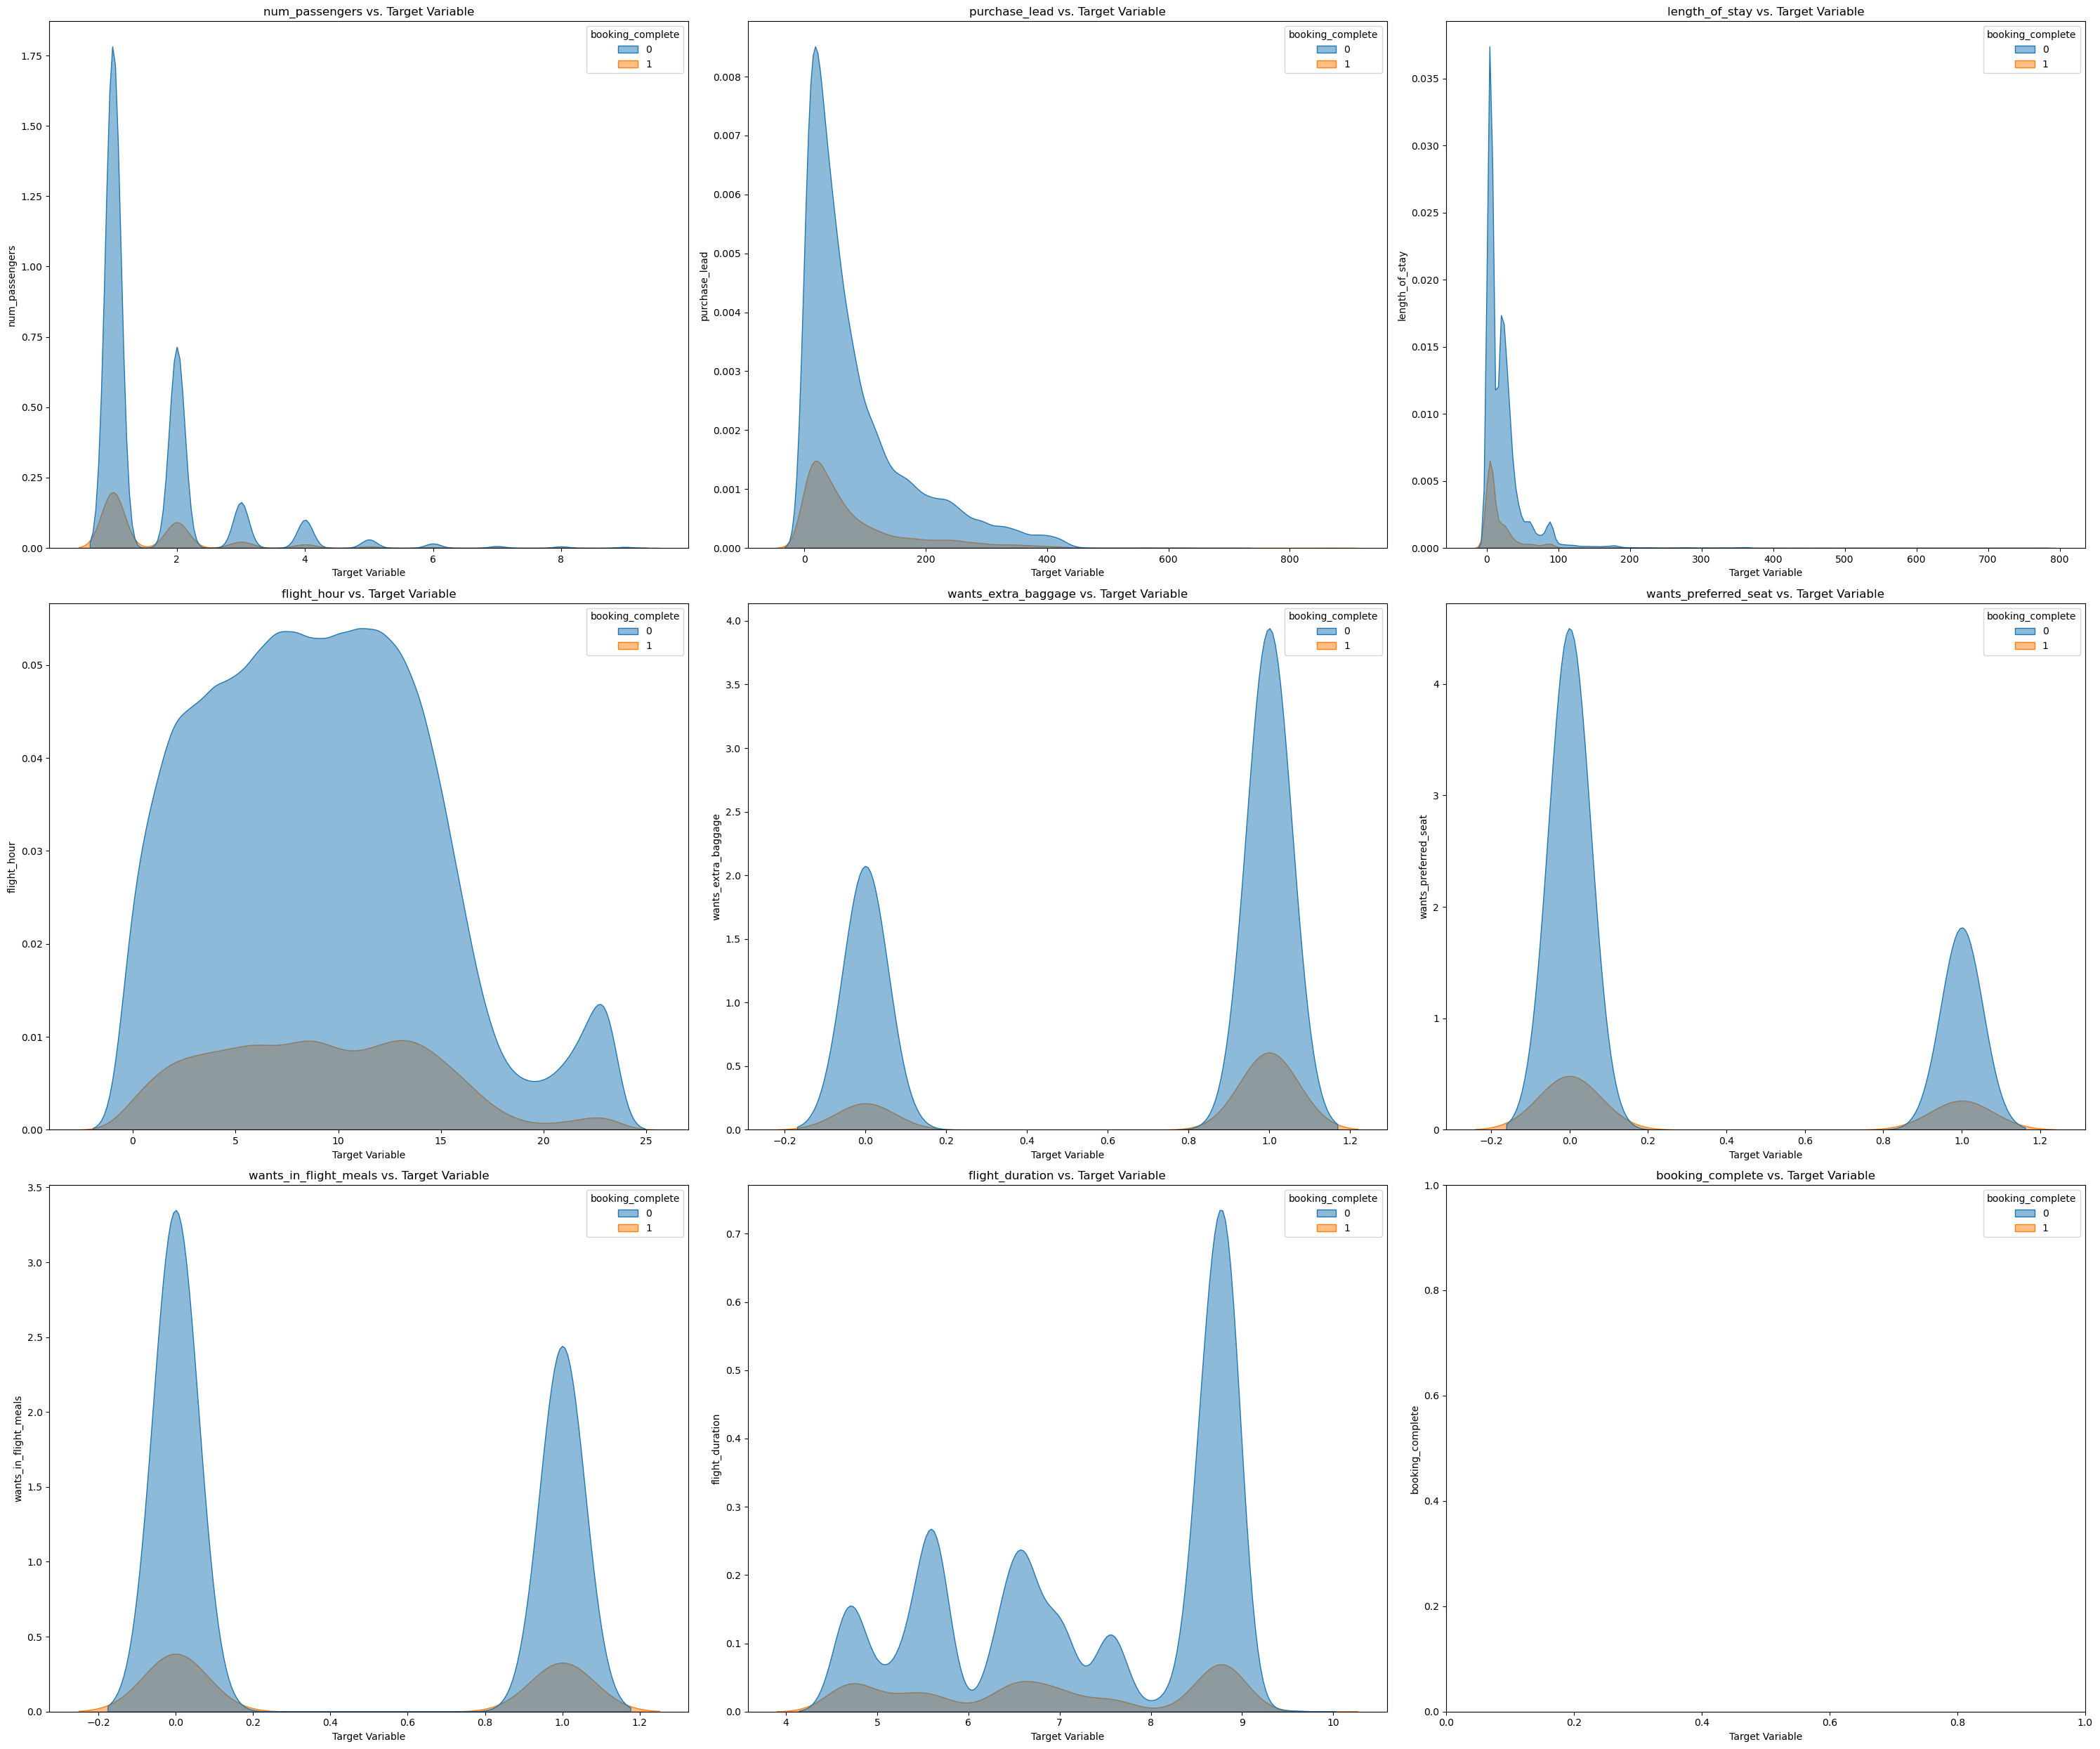

In [101]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_cols = 3  # Number of columns per row
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  # Calculate number of rows

plt.figure(figsize=(30,25))
for i, num_col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.kdeplot(data=df, x=num_col, hue='booking_complete', fill=True, alpha=0.5)
    plt.title(f'{num_col} vs. Target Variable')
    plt.xlabel('Target Variable')
    plt.ylabel(num_col)

plt.tight_layout()
plt.show()

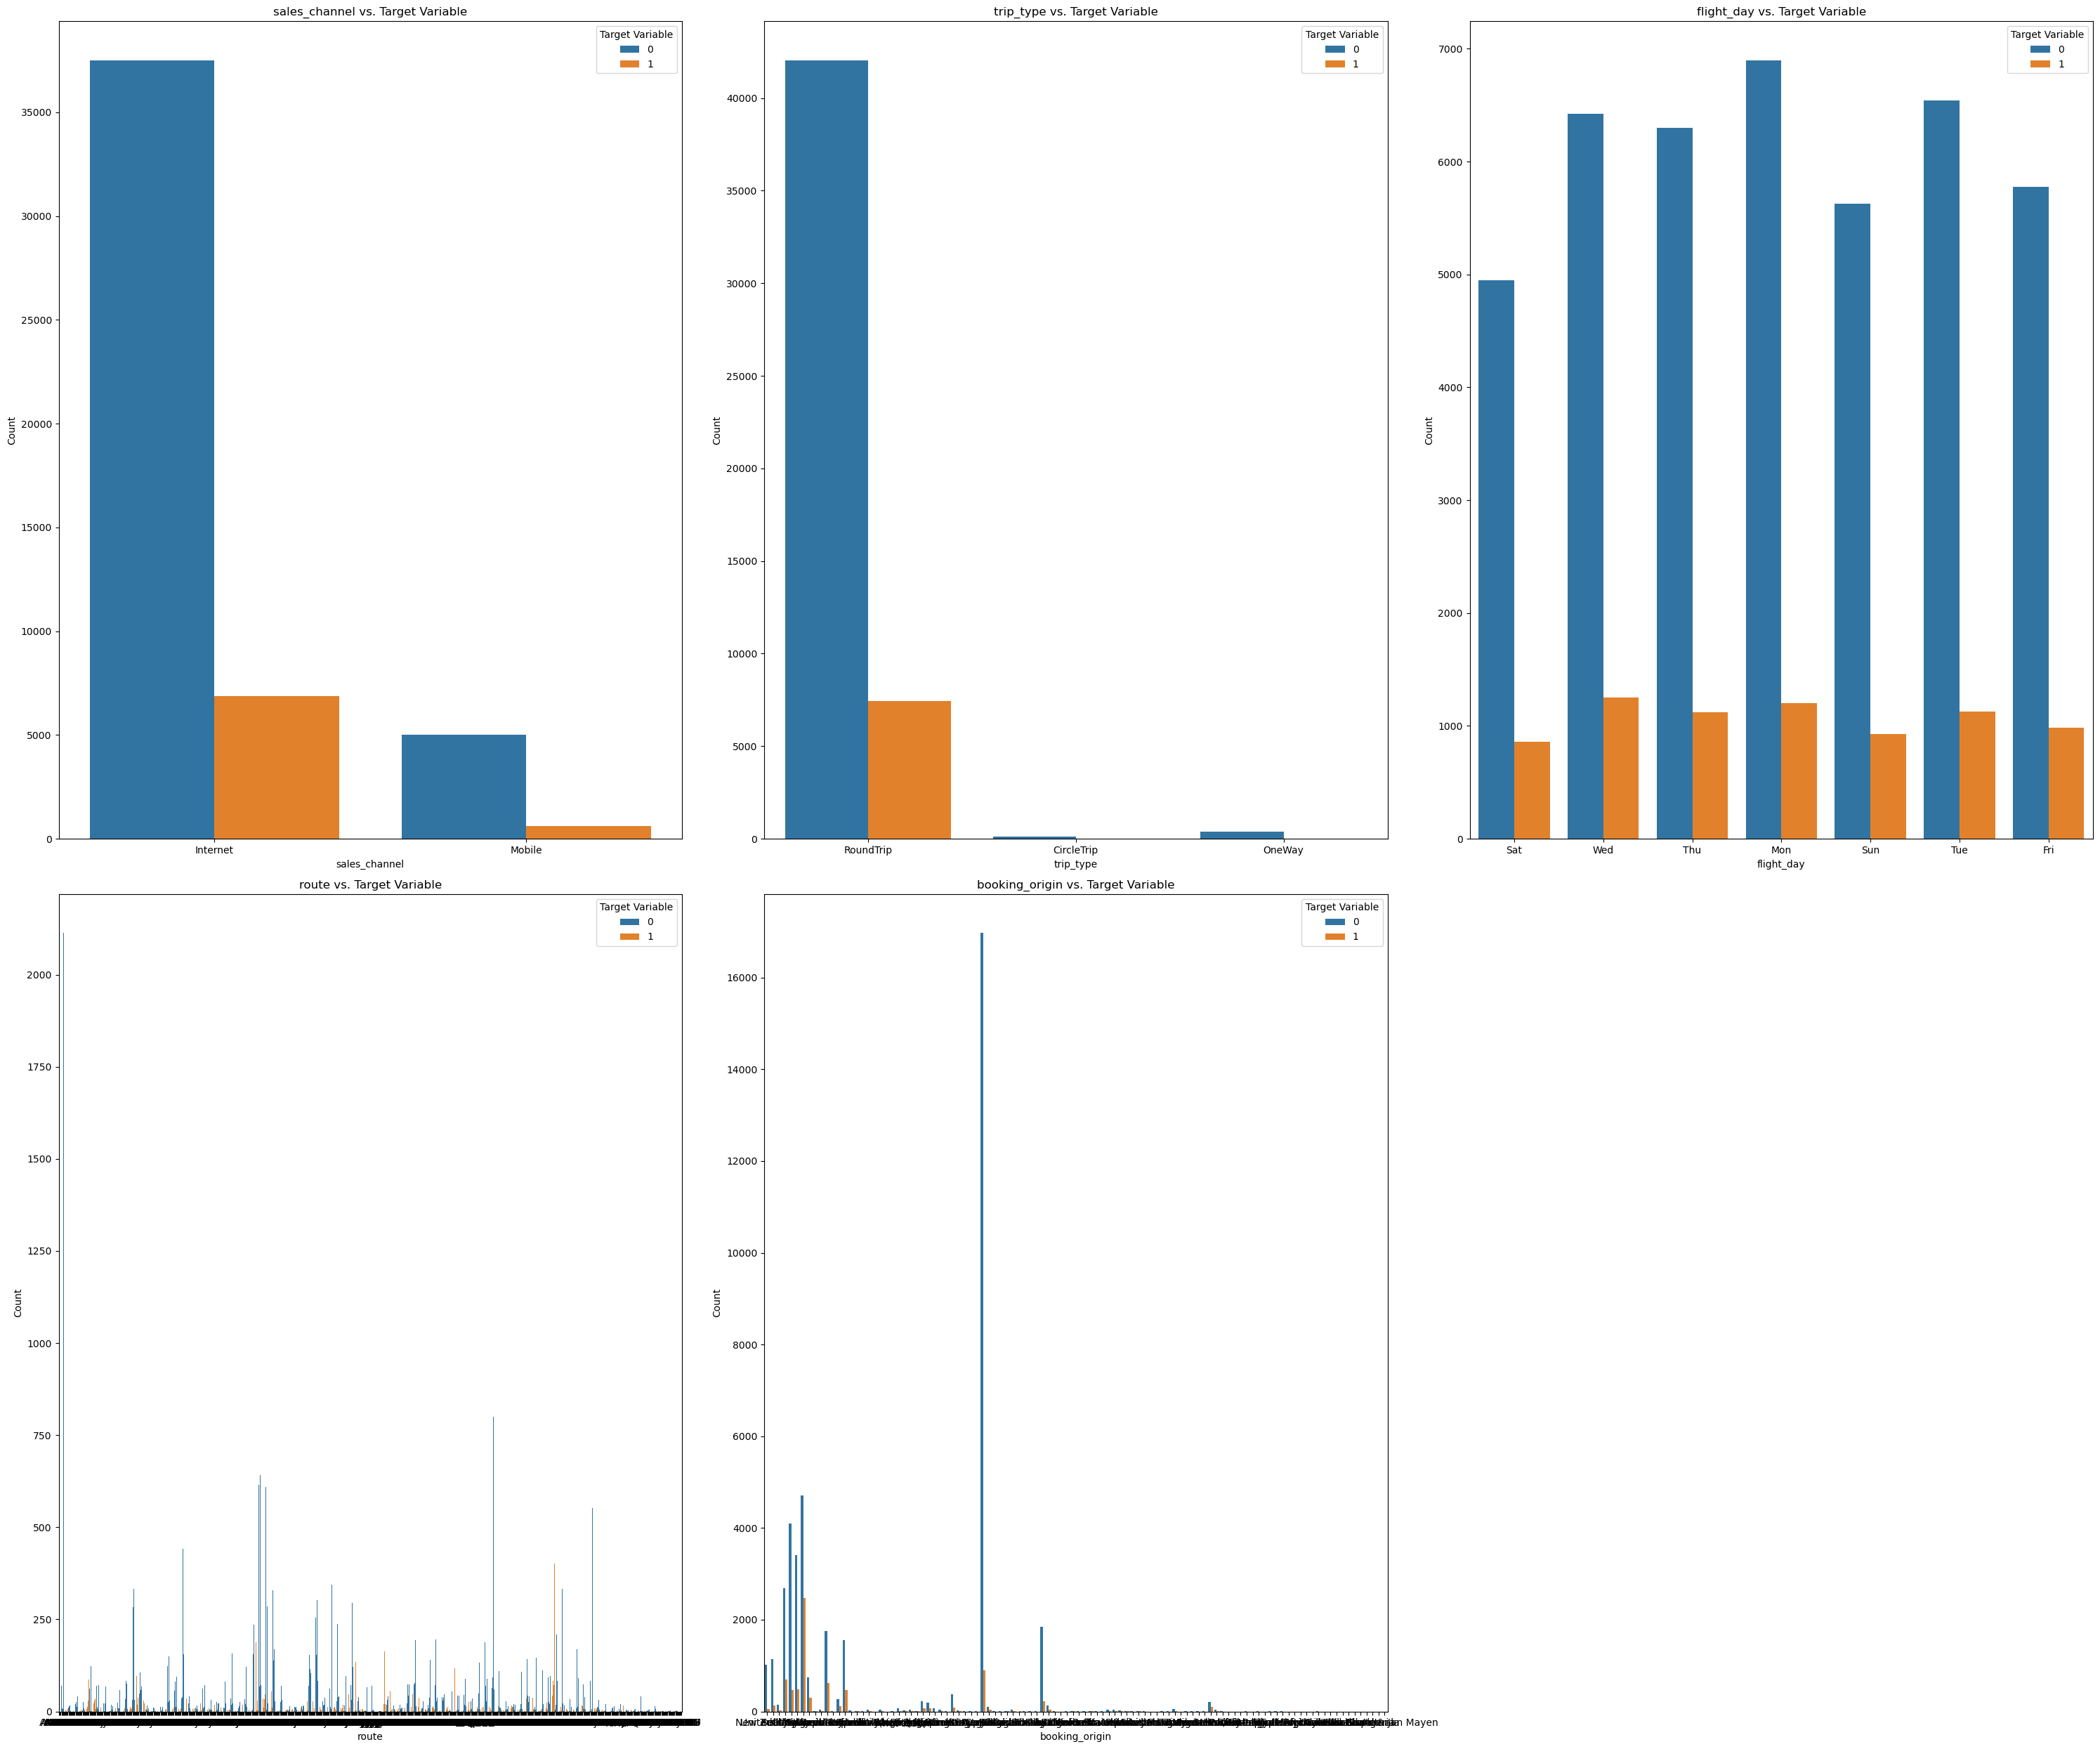

In [104]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
num_rows_cat = (len(categorical_columns) + num_cols - 1) // num_cols  # Calculate number of rows
plt.figure(figsize=(30,25))
for i, cat_col in enumerate(categorical_columns, 1):
    plt.subplot(num_rows_cat, num_cols, i)
    sns.countplot(x=cat_col, hue='booking_complete', data=data)
    plt.title(f'{cat_col} vs. Target Variable')
    plt.xlabel(cat_col)
    plt.ylabel('Count')
    plt.legend(title='Target Variable', loc='upper right')

plt.tight_layout()
plt.show()

In [106]:
data['route'].value_counts()

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

### Let's handle the skew in "purchase_lead" and "length_of_stay" 

In [8]:
columns_to_transform = ['length_of_stay','purchase_lead','flight_duration']

for col in columns_to_transform:
    data[f"log_{col}"] = np.log(data[col] + 1)

In [9]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,log_length_of_stay,log_purchase_lead,log_flight_duration
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,2.995732,5.572154,1.874874
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,3.044522,4.727388,1.874874
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,3.135494,5.497168,1.874874
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,3.465736,4.574711,1.874874
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,3.135494,4.234107,1.874874


In [109]:
data.shape

(50000, 17)

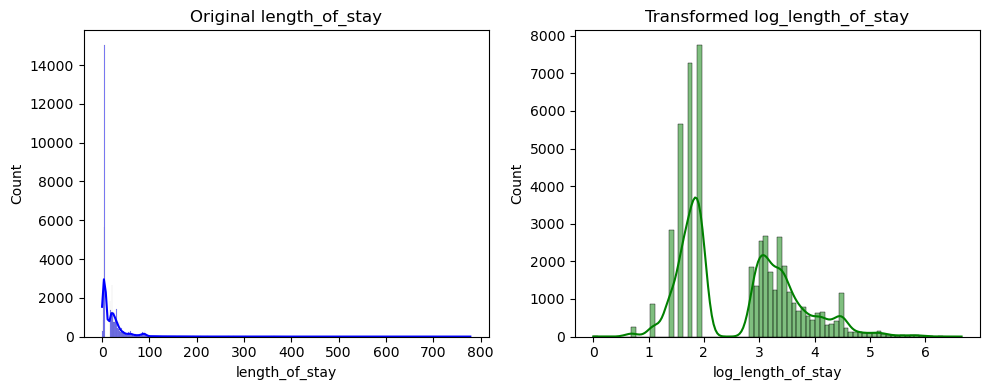

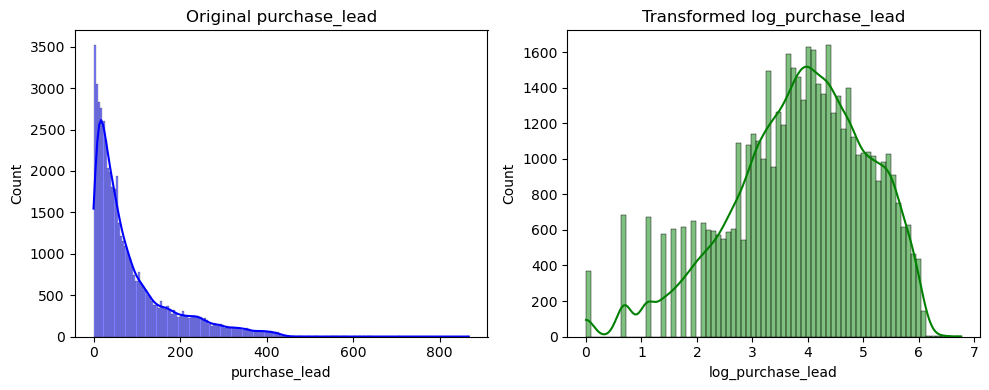

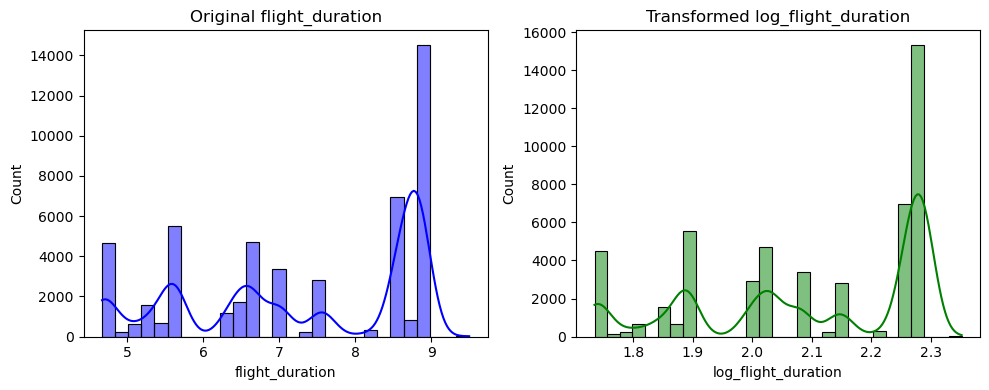

In [12]:
for col in columns_to_transform:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, color='blue')
    plt.title(f'Original {col}')

    plt.subplot(1, 2, 2)
    sns.histplot(data[f'log_{col}'], kde=True, color='green')
    plt.title(f'Transformed log_{col}')

    plt.tight_layout()
    plt.show()

## Target Variable

In [110]:
data['booking_complete'].value_counts(normalize=True)*100

booking_complete
0    85.044
1    14.956
Name: proportion, dtype: float64

- We clearly have a class imbalance.

In [55]:
cat_df.head()

,sales_channel,trip_type,flight_day,route,booking_origin
0,Internet,RoundTrip,Sat,AKLDEL,New Zealand
1,Internet,RoundTrip,Sat,AKLDEL,New Zealand
2,Internet,RoundTrip,Wed,AKLDEL,India
3,Internet,RoundTrip,Sat,AKLDEL,New Zealand
4,Internet,RoundTrip,Wed,AKLDEL,India


# One Hot Encoding

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
def separate_dataframe(data):
  num_df = data.select_dtypes(include=['number'])
  cat_df = data.select_dtypes(exclude=['number'])

  return num_df,cat_df

In [114]:
data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'log_length_of_stay', 'log_purchase_lead', 'log_flight_duration'],
      dtype='object')

In [15]:
X = data.drop(columns=['booking_complete','length_of_stay','purchase_lead','flight_duration'])
y = data['booking_complete']

In [16]:
print(X.shape)
print(y.shape)

(50000, 13)
(50000,)


In [17]:
cat_df.columns

Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')

In [24]:
numerical_df,categorical_df = separate_dataframe(X)

In [20]:
categorical_df.head(3)

,sales_channel,trip_type,flight_day,route,booking_origin
0,Internet,RoundTrip,Sat,AKLDEL,New Zealand
1,Internet,RoundTrip,Sat,AKLDEL,New Zealand
2,Internet,RoundTrip,Wed,AKLDEL,India


In [21]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = enc.fit_transform(categorical_df)

In [22]:
enc_array = enc_df.toarray()
enc_df = pd.DataFrame(enc_array,columns=enc.get_feature_names_out())
enc_df.dtypes.value_counts()

float64    915
Name: count, dtype: int64

Standardizing the numerous variables

In [14]:
from sklearn.preprocessing import StandardScaler

In [24]:
numerical_df.shape

(50000, 8)

In [25]:
numerical_df.head()

,num_passengers,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,log_length_of_stay,log_purchase_lead,log_flight_duration
0,2,7,1,0,0,2.995732,5.572154,1.874874
1,1,3,0,0,0,3.044522,4.727388,1.874874
2,2,17,1,1,0,3.135494,5.497168,1.874874
3,1,4,0,0,1,3.465736,4.574711,1.874874
4,2,15,1,0,1,3.135494,4.234107,1.874874


In [26]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numerical_df)
scaled_df = pd.DataFrame(scaled_df,columns=scaler.get_feature_names_out())

In [27]:
print(scaled_df.shape)
scaled_df.head()

(50000, 8)


,num_passengers,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,log_length_of_stay,log_purchase_lead,log_flight_duration
0,0.400684,-0.381764,0.703747,-0.649919,-0.863497,0.364641,1.397979,-1.157825
1,-0.579559,-1.120780,-1.420965,-0.649919,-0.863497,0.413170,0.712500,-1.157825
2,0.400684,1.465775,0.703747,1.538654,-0.863497,0.503656,1.337132,-1.157825
3,-0.579559,-0.936026,-1.420965,-0.649919,1.158082,0.832133,0.588612,-1.157825
4,0.400684,1.096267,0.703747,-0.649919,1.158082,0.503656,0.312231,-1.157825


In [28]:
final_df = pd.concat([scaled_df,enc_df],axis=1)
final_df.shape

(50000, 923)

In [131]:
final_df.head()

,num_passengers,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,log_length_of_stay,log_purchase_lead,log_flight_duration,sales_channel_Internet,sales_channel_Mobile,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,0.400684,-0.381764,0.703747,-0.649919,-0.863497,0.364641,1.397979,-1.157825,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.579559,-1.120780,-1.420965,-0.649919,-0.863497,0.413170,0.712500,-1.157825,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.400684,1.465775,0.703747,1.538654,-0.863497,0.503656,1.337132,-1.157825,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.579559,-0.936026,-1.420965,-0.649919,1.158082,0.832133,0.588612,-1.157825,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.400684,1.096267,0.703747,-0.649919,1.158082,0.503656,0.312231,-1.157825,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


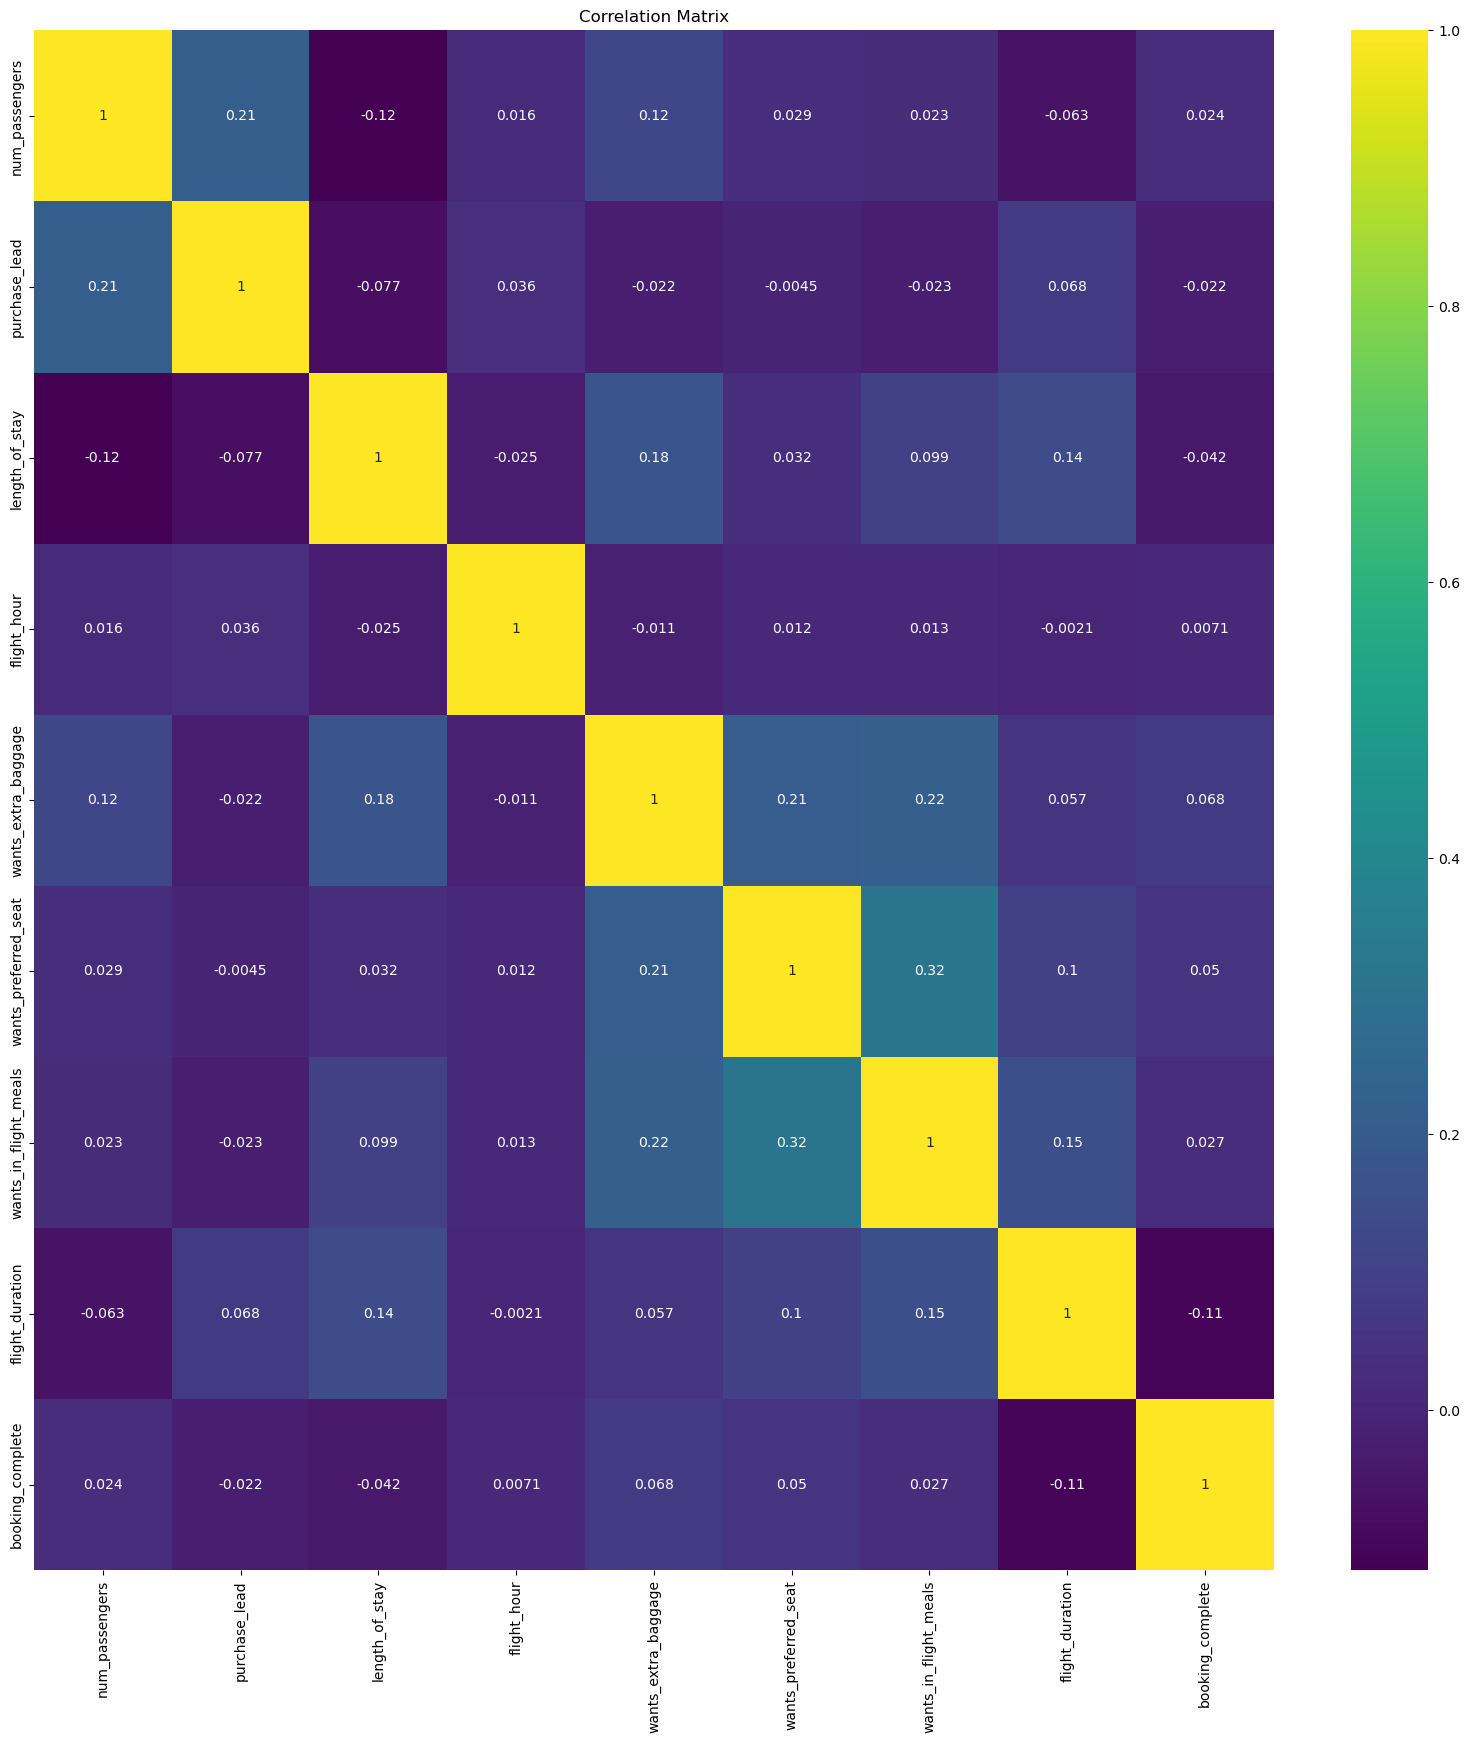

In [135]:
corr_mat = num_df.corr()
plt.figure(figsize=(20,20))
g=sns.heatmap(corr_mat,annot=True,cmap="viridis")
plt.title("Correlation Matrix")
plt.show()

Dimensionality Reduction

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA()
X_pca = pca.fit_transform(final_df)

In [31]:
exp_var_ratio = pca.explained_variance_ratio_
cum_var_ratio = exp_var_ratio.cumsum()

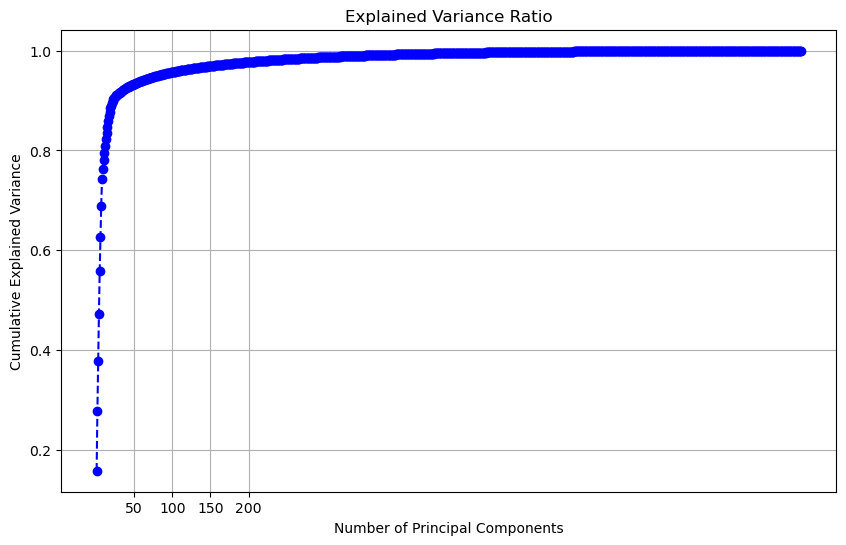

In [147]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(exp_var_ratio) + 1), cum_var_ratio, marker='o', linestyle='--', color='b')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.xticks([50, 100, 150, 200])
plt.show()


In [32]:
num_components = 50
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(final_df)

In [33]:
# Create a new DataFrame with PCA components
columns_pca = [f'PC{i+1}' for i in range(num_components)]
df_pca = pd.DataFrame(data=X_pca, columns=columns_pca)

In [34]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,-0.556025,0.925195,-0.770898,1.366927,0.815727,-1.063937,-0.116598,-0.157314,0.023298,-0.058373,...,0.014912,-0.156191,0.013363,0.000843,-0.007688,-0.069925,-0.041878,0.007262,-0.011852,-0.075859
1,-1.593624,-0.551023,-0.548681,0.877299,-0.508098,-1.401147,0.313743,0.774701,0.155746,-0.134411,...,0.015481,-0.159029,0.014784,0.003232,-0.007873,-0.067828,-0.045748,0.006205,-0.008851,-0.079969
2,0.413037,1.577713,0.079229,-0.467378,1.463408,-1.407276,-1.346783,0.730638,-0.005390,-0.249085,...,0.004940,-0.027099,-0.030929,0.003989,-0.006858,-0.000588,-0.018453,-0.004897,-0.009850,-0.005724
3,-0.419787,-0.546242,-0.044330,0.470545,-0.584000,-1.418407,1.889709,0.865132,0.261385,-0.123864,...,0.015206,-0.155048,0.009815,-0.005332,-0.007742,-0.071734,-0.046192,0.007033,-0.008063,-0.077268
4,0.403124,0.778736,0.313516,-0.067306,1.588010,-0.326882,1.376481,-0.037756,0.053799,-0.169064,...,0.006229,-0.017997,-0.036179,-0.006518,-0.007706,-0.000050,-0.016269,-0.003996,-0.006399,-0.006970


Modelling

In [41]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=42)

In [37]:
print(X_train.shape)
print(y_train.shape)

(40000, 50)
(40000,)


In [39]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())



Cross-Validation Scores: [0.84625  0.850125 0.84975  0.844375 0.854375]
Mean CV Score: 0.8489749999999999


In [40]:
scores = cross_validate(rf_classifier, X_train, y_train, cv=5, scoring=['precision','recall','accuracy'])

In [41]:
for key, value in scores.items():
  print(key,value,value.mean())

fit_time [50.3074317  51.50124311 51.98136997 52.77353597 48.33141589] 50.978999328613284
score_time [0.16701436 0.16505623 0.15264344 0.16154957 0.16512394] 0.1622775077819824
test_precision [0.4495114  0.5        0.49673203 0.42524917 0.56140351] 0.48657922100048046
test_recall [0.11509591 0.117598   0.12666667 0.10666667 0.13333333] 0.11987211565193216
test_accuracy [0.84625  0.850125 0.84975  0.844375 0.854375] 0.8489749999999999


# With Stratified Sampling

In [55]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_pca, y, test_size=0.2, random_state=42, stratify=y)
rf_classifier_2 = RandomForestClassifier(n_estimators=100, random_state=42)
scores_2 = cross_validate(rf_classifier_2,X_train_2,y_train_2,cv=5,scoring=['precision','recall','accuracy'])

In [56]:
for key, value in scores_2.items():
    print(key,value,value.mean())

fit_time [49.53079796 49.34463096 49.59868336 49.76816988 48.74981618] 49.39841966629028
score_time [0.15137196 0.15396285 0.14990211 0.15048003 0.15047598] 0.1512385845184326
test_precision [0.5        0.47037037 0.48       0.48611111 0.51027397] 0.48935109081684425
test_recall [0.1270903  0.10618729 0.13043478 0.11695906 0.12447786] 0.12102986004587835
test_accuracy [0.8505   0.8485   0.848875 0.849375 0.851125] 0.8496750000000001


## Target Encoding

In [57]:
# pip install category_encoders

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from category_encoders import TargetEncoder 

In [4]:
# Load your original dataset (replace 'your_data.csv' with the actual file path)
df = pd.read_csv(r"C:\Users\user\Desktop\Projects\British_Airways_Project\Data\customer_booking.csv", encoding='latin1')

# Assume 'target' is your target variable, and 'features' contains all features
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
# Define preprocessing steps for numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [7]:
# categorical_df

### How the target encoder works

In [26]:
target_enc = TargetEncoder()
cat_target_enc = target_enc.fit_transform(categorical_df,df['booking_complete'])

In [27]:
cat_target_enc

,sales_channel,trip_type,flight_day,route,booking_origin
0,0.15477,0.150575,0.148142,0.074780,0.050279
1,0.15477,0.150575,0.148142,0.074780,0.050279
2,0.15477,0.150575,0.163148,0.074780,0.103150
3,0.15477,0.150575,0.148142,0.074780,0.050279
4,0.15477,0.150575,0.163148,0.074780,0.103150
...,...,...,...,...,...
49995,0.15477,0.150575,0.148142,0.058824,0.050358
49996,0.15477,0.150575,0.141440,0.058824,0.050358
49997,0.15477,0.150575,0.148142,0.058824,0.050358
49998,0.15477,0.150575,0.148605,0.058824,0.050358


- TargetEncoder
- Retains the same number of features.
- Compare the performances

In [32]:
numeric_features

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration'],
      dtype='object')

In [33]:
categorical_features

Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')

In [8]:

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('target_encoder', TargetEncoder()),  # Use TargetEncoder for non-ordinal categorical features)  # Adjust the explained variance threshold as needed
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Combine preprocessing with RandomForestClassifier in a pipeline
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
X_train

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
11179,2,Mobile,RoundTrip,168,38,8,Tue,HANMEL,Australia,0,0,1,8.83
26739,1,Internet,RoundTrip,54,3,1,Sat,CGKICN,South Korea,0,1,0,6.62
16263,1,Internet,RoundTrip,221,17,0,Sun,KCHPER,Malaysia,1,0,1,5.62
8082,1,Internet,RoundTrip,59,36,1,Wed,DADSYD,Australia,0,0,1,8.58
39980,6,Internet,RoundTrip,49,5,10,Fri,KBVPVG,China,1,0,0,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28615,1,Internet,RoundTrip,8,3,1,Wed,MAAPER,Australia,0,0,0,5.62
30642,1,Internet,RoundTrip,16,4,12,Sun,DMKICN,South Korea,1,0,1,6.62
42175,1,Internet,RoundTrip,18,5,6,Sat,SINXIY,Australia,0,0,1,5.00
4242,1,Internet,RoundTrip,0,26,2,Thu,CGKPER,Australia,1,1,0,5.62


In [11]:
from sklearn.model_selection import cross_validate

In [12]:
scores_3 = cross_validate(rf_model,X_train,y_train,cv=5,scoring=['precision','recall','accuracy'])

In [13]:
for key,value in scores_3.items():
    print(key,value,value.mean())

fit_time [5.85591197 5.11025786 4.38344789 4.32685399 4.39443302] 4.814180946350097
score_time [0.25575399 0.23716259 0.18365598 0.17846084 0.1722672 ] 0.2054601192474365
test_precision [0.49695122 0.50882353 0.53203343 0.51632047 0.5       ] 0.5108257299770503
test_recall [0.13628763 0.14464883 0.159699   0.14536341 0.14369256] 0.14593828495430325
test_accuracy [0.85025  0.85125  0.853375 0.85175  0.850375] 0.8513999999999999


Fitting the model to be able to confirm whether preprocessing steps were done.

In [53]:
# Assuming you've already defined and fitted your pipeline
rf_model.fit(X_train, y_train)

# Access the names of the transformed features
transformed_feature_names = rf_model.named_steps['preprocessor'].get_feature_names_out()

# Transform the training data using the pipeline
X_train_transformed = rf_model.named_steps['preprocessor'].transform(X_train)

# Convert the transformed data to a DataFrame for inspection
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=transformed_feature_names)

In [54]:
X_train_transformed_df

,num__num_passengers,num__purchase_lead,num__length_of_stay,num__flight_hour,num__wants_extra_baggage,num__wants_preferred_seat,num__wants_in_flight_meals,num__flight_duration,cat__sales_channel,cat__trip_type,cat__flight_day,cat__route,cat__booking_origin
0,0.399572,0.908950,0.443361,-0.197228,-1.425129,-0.651421,1.154574,1.038292,0.110440,0.150619,0.146119,0.102658,0.050248
1,-0.582238,-0.345665,-0.588804,-1.487561,-1.425129,1.535106,-0.866120,-0.437286,0.154474,0.150619,0.149396,0.183230,0.106978
2,-0.582238,1.492235,-0.175938,-1.671895,0.701691,-0.651421,1.154574,-1.104968,0.154474,0.150619,0.136908,0.213930,0.341596
3,-0.582238,-0.290638,0.384380,-1.487561,-1.425129,-0.651421,1.154574,0.871372,0.154474,0.150619,0.163830,0.053177,0.050248
4,4.326814,-0.400692,-0.529823,0.171439,0.701691,-0.651421,-0.866120,-1.298596,0.154474,0.150619,0.147048,0.178838,0.204393
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,-0.582238,-0.851912,-0.588804,-1.487561,-1.425129,-0.651421,-0.866120,-1.104968,0.154474,0.150619,0.163830,0.061955,0.050248
39996,-0.582238,-0.763869,-0.559314,0.540106,0.701691,-0.651421,1.154574,-0.437286,0.154474,0.150619,0.136908,0.132701,0.106978
39997,-0.582238,-0.741859,-0.529823,-0.565894,-1.425129,-0.651421,1.154574,-1.518931,0.154474,0.150619,0.149396,0.197799,0.050248
39998,-0.582238,-0.939956,0.089475,-1.303228,0.701691,1.535106,-0.866120,-1.104968,0.154474,0.150619,0.152845,0.160417,0.050248


## With Smote

In [14]:
from imblearn.over_sampling import SMOTE

In [21]:
from imblearn.pipeline import make_pipeline as make_imb_pipeline

In [26]:
numeric_transfromer = Pipeline(steps=[('scaler',StandardScaler())])

categorical_transformer = Pipeline(steps=[('target_encoder',TargetEncoder())])

prerocessor  =ColumnTransformer(transformers=[('num',numeric_transformer,numeric_features),
                                              ('cat',categorical_transformer,categorical_features)])

smote = SMOTE(sampling_strategy='auto',random_state=42,n_jobs=-1)

rf_model_2 = make_imb_pipeline(preprocessor, smote, RandomForestClassifier(n_estimators=100, random_state=42))



In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
X_train

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
11179,2,Mobile,RoundTrip,168,38,8,Tue,HANMEL,Australia,0,0,1,8.83
26739,1,Internet,RoundTrip,54,3,1,Sat,CGKICN,South Korea,0,1,0,6.62
16263,1,Internet,RoundTrip,221,17,0,Sun,KCHPER,Malaysia,1,0,1,5.62
8082,1,Internet,RoundTrip,59,36,1,Wed,DADSYD,Australia,0,0,1,8.58
39980,6,Internet,RoundTrip,49,5,10,Fri,KBVPVG,China,1,0,0,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28615,1,Internet,RoundTrip,8,3,1,Wed,MAAPER,Australia,0,0,0,5.62
30642,1,Internet,RoundTrip,16,4,12,Sun,DMKICN,South Korea,1,0,1,6.62
42175,1,Internet,RoundTrip,18,5,6,Sat,SINXIY,Australia,0,0,1,5.00
4242,1,Internet,RoundTrip,0,26,2,Thu,CGKPER,Australia,1,1,0,5.62


In [27]:
try:
    scores_4 = cross_validate(rf_model_2,X_train,y_train,cv=5,scoring=['precision','recall','accuracy'])
except ValueError as e:
    print(f"Error during cross validation: {e}")

c:\Users\user\anaconda3\envs\british_airways\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
c:\Users\user\anaconda3\envs\british_airways\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
c:\Users\user\anaconda3\envs\british_airways\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
c:\Users\user\anaconda3\envs\british_airways\Lib\site-packages\imblearn\over_sampling\_smote\base

In [28]:
for key,value in scores_4.items():
    print(key,value,value.mean())

fit_time [14.76803374 12.60654759 12.65781426 12.78460455 12.82976198] 13.12935242652893
score_time [0.20066738 0.20883226 0.2081871  0.20700336 0.22532821] 0.210003662109375
test_precision [0.44255319 0.41404358 0.41738066 0.43147208 0.41585366] 0.4242606351468085
test_recall [0.26086957 0.28595318 0.28511706 0.28404344 0.28487886] 0.2801724210191029
test_accuracy [0.840375 0.83275  0.833625 0.836875 0.833125] 0.83535


In [30]:
rf_model_2.fit(X_train,y_train)
y_pred = rf_model_2.predict(X_test)

c:\Users\user\anaconda3\envs\british_airways\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [33]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Precision Recall Curve')

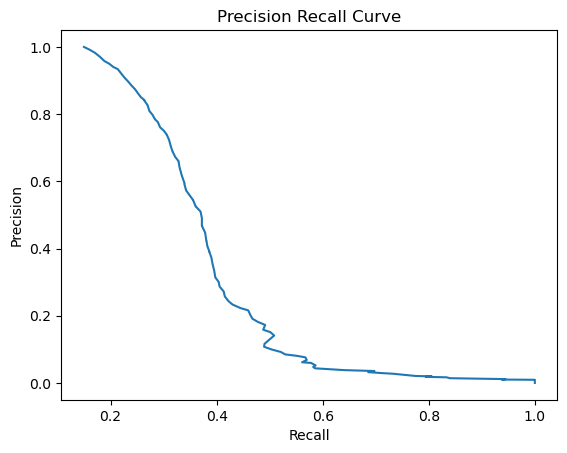

In [34]:
y_pred_prob = rf_model_2.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

## Feature Engineering

In [36]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [37]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')


Feature engineering involves transforming or creating new features from existing ones to improve the performance of a machine learning model. Here are some potential feature engineering ideas for the features you mentioned:

'num_passengers':

If the number of passengers is too granular, you might create bins (e.g., 1, 2, 3, 4, 5+) to simplify the feature.
'sales_channel':

One-hot encode the sales channel if it's categorical.
Extract information about the sales channel (e.g., online, offline, direct).
'trip_type':

One-hot encode trip types if they are categorical.
Consider combining similar trip types if there are too many categories.
'purchase_lead':

Convert purchase_lead to a datetime object if it's in a different format.
Extract features like day of the week, month, or year from the purchase_lead date.
'length_of_stay':

Categorize the length of stay into short, medium, and long durations.
Extract features like the total number of nights or days.
'flight_hour':

Categorize flight hours into morning, afternoon, evening, night.
Extract features like time of day (e.g., morning rush, evening rush).
'flight_day':

Extract features like day of the week or weekend vs. weekday.
One-hot encode if the days have significant variations.
'route':

If there are too many routes, consider grouping them based on common characteristics.
One-hot encode or label encode categorical routes.
'booking_origin':

One-hot encode the booking origin if it's categorical.
Extract information about the booking origin.
'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals':

Convert binary features to 0 and 1 if they are not already.
Create a new feature indicating the total number of extra services requested.
'flight_duration':

Categorize flight durations into short, medium, and long.
Extract numerical features like the total number of minutes.

In [1]:
data.head()

NameError: name 'data' is not defined